# Phase diagram tutorial

A phase diagram in physical chemistry is a type of chart used to show conditions (pressure, temperature, volume etc.) at which thermodynamically distinct phases occur and coexist at equilibrium. Common components of a phase diagram are *lines of equilibrium* or *phase boundaries*, which refer to lines that mark conditions under which multiple phases can coexist at equilibrium. Phase transitions occur along lines of equilibrium.

The simplest phase diagrams are pressure–temperature diagrams of a single simple substance, such as water. The axes correspond to the pressure and temperature. The phase diagram shows, in pressure–temperature space, the lines of equilibrium or phase boundaries between the three phases of solid, liquid, and vapor.

## Clausius-Clapeyron relation

The Clausius–Clapeyron relation is a way of characterizing a discontinuous phase transition between two phases of matter of a single constituent.

On a pressure–temperature (P–T) diagram, the line separating the two phases is known as the coexistence curve. The Clausius–Clapeyron relation gives the slope of the tangents to this curve. Mathematically,

$$
\frac{\mathrm{d} P}{\mathrm{d} T} = \frac{L}{T \Delta v} = \frac{\Delta s}{\Delta v}
$$

where $\mathrm {d} P/\mathrm {d} T$ is the slope of the tangent to the coexistence curve at any point, $L$ is the specific latent heat, $T$ is the temperature, $\Delta v$ is the specific volume change of the phase transition, and $\Delta s$ is the specific entropy change of the phase transition.

The following equations are derived from the above relation and are used in this project.

### Solid-liquid boundary

$$
P(T) = P_{TP} + \frac{\Delta \bar{H}_{\mathrm{melt}}}{\Delta \bar{V}_{\mathrm{melt}}} \ln{\left( \frac{T}{T_{TP}} \right)}
$$

where $P_{TP}$ is the pressure at the tripĺe point; $\Delta \bar{H}_{\mathrm{melt}}$ is the molar enthalpy change of fusion; $\Delta \bar{V}_{\mathrm{melt}}$ is molar volume change of fusion; $T_{TP}$ is the temperature at the tripĺe point.

### Solid-vapor boundary

$$
P(T) = P_{TP} \exp \left[ \frac{\Delta \bar{H}_{\mathrm{sub}}}{R} \left(\frac{1}{T_{TP}} - \frac{1}{T
} \right) \right] 
$$

where $P_{TP}$ is the pressure at the tripĺe point; $\Delta \bar{H}_{\mathrm{sub}}$ is the molar enthalpy change of sublimation; $T_{TP}$ is the temperature at the tripĺe point.

### Liquid-vapor boundary

$$
P(T) = P_{TP} \exp \left[ \frac{\Delta \bar{H}_{\mathrm{vap}}}{R} \left(\frac{1}{T_{TP}} - \frac{1}{T
} \right) \right] 
$$

where $P_{TP}$ is the pressure at the tripĺe point; $\Delta \bar{H}_{\mathrm{vap}}$ is the molar enthalpy change of vaporization; $T_{TP}$ is the temperature at the tripĺe point.

## Antoine equation

The Antoine equation is a class of semi-empirical correlations describing the relation between vapor pressure and temperature for pure substances. The Antoine equation is derived from the Clausius–Clapeyron relation. 

$$
\log_{10}(P) = A - \frac{B}{C+T}
$$

where $P$ is the vapor pressure, $T$ is temperature and $A$, $B$ and $C$ are component-specific constants.

Usually, when we apply the Clausius-Clapeyron equation to liquid-vapour phase transition, we make one approximation ($V_l≪V_v$) and one assumption (low saturation pressure). However, the saturation pressure might not be low so the assumption we used above is not valid. The Antoine's equation, as a modified form, is more accurate especially at high saturation pressure.

By default, the present program plots liquid-vapor boundaries with the Antoine Equation. The user can change this setting as demonstrated in the following tutorial.

## Using the package - water example

First, let's import it:

In [1]:
from phase_diagram.phase_diagram import PhaseDiagram

A phase diagram object can be created passing a string with a formula, a lowercase name or a CAS number.

In [2]:
water = PhaseDiagram('H2O') # or 'water' or '7732-18-5'

The name, formula and CAS number for the object can be easily confirmed:

In [3]:
water.name

'water'

In [4]:
water

PhaseDiagram(name= water, CAS= 7732-18-5, formula= H2O)

In [5]:
print(water)

Phase diagram data for compound water, CAS 7732-18-5, formula H2O


In [6]:
water.formula

'H2O'

In [7]:
water.cas

'7732-18-5'

The package uses [pint](https://pint.readthedocs.io/en/stable/) so the data has units:

In [8]:
water.critical_point

point(temperature=<Quantity(647.1, 'kelvin')>, pressure=<Quantity(22060000.0, 'pascal')>)

In [9]:
water.critical_point.temperature

647.1 <Unit('kelvin')>

In [10]:
water.critical_point.pressure

22060000.0 <Unit('pascal')>

Pint supports f-strings:

In [11]:
print(f'{water.critical_point.pressure:~P.3e}') # scientific form formatting with unit pretty printing

2.206×10⁷ Pa


The Antoine parameters available are for pressure in mmHg and temperature in Celsius. The `Tmin` and `Tmax` attributes -- the temperature range for A, B and C -- are also in Celsius but are stored without units since all Antoine data are internally converted to SI units:

In [12]:
water.antoine

antoine(Tmin=0.01, Tmax=373.98, A=8.05573, B=1723.6425, C=233.08)

For those who want Antoine parameters in SI units:

In [13]:
water.antoine_si

antoine_si(Tmin=273.15999999999997, Tmax=647.13, A=10.18063302013294, B=1723.6425, C=-40.069999999999965)

One can see the data internally used to build a given boundary calling the methods `clapeyron_sl`, `clapeyron_sv`, `clapeyron_lv`, and `antoine_lv` for Clausius-Clapeyron solid-liquid, solid-vapor, liquid-vapor boundaries and Antoine liquid-vapor boundary respectively. 100 points are calculated to each boundary and can be exported. Internally, the package uses SI units.

In [14]:
water.clapeyron_sl()

(array([273.16      , 273.10949495, 273.0589899 , 273.00848485,
        272.9579798 , 272.90747475, 272.8569697 , 272.80646465,
        272.7559596 , 272.70545455, 272.65494949, 272.60444444,
        272.55393939, 272.50343434, 272.45292929, 272.40242424,
        272.35191919, 272.30141414, 272.25090909, 272.20040404,
        272.14989899, 272.09939394, 272.04888889, 271.99838384,
        271.94787879, 271.89737374, 271.84686869, 271.79636364,
        271.74585859, 271.69535354, 271.64484848, 271.59434343,
        271.54383838, 271.49333333, 271.44282828, 271.39232323,
        271.34181818, 271.29131313, 271.24080808, 271.19030303,
        271.13979798, 271.08929293, 271.03878788, 270.98828283,
        270.93777778, 270.88727273, 270.83676768, 270.78626263,
        270.73575758, 270.68525253, 270.63474747, 270.58424242,
        270.53373737, 270.48323232, 270.43272727, 270.38222222,
        270.33171717, 270.28121212, 270.23070707, 270.18020202,
        270.12969697, 270.07919192, 270.

To plot a phase diagram use the `plot` method. By default, the plot has a log scale and SI units.

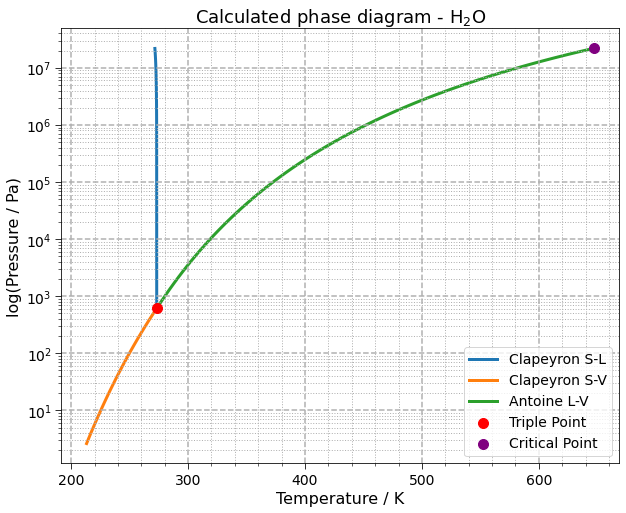

In [15]:
water.plot()

Any unit available in Pint package can be passed to the method as shown below:

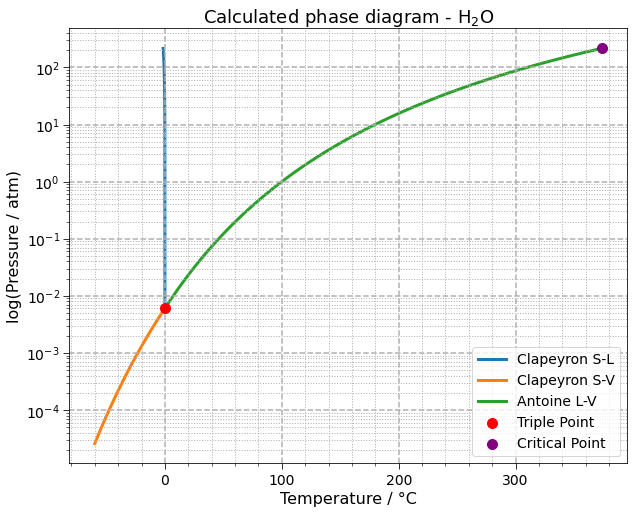

In [16]:
water.plot(T_unit='°C', P_unit='atm')

If a non logarithmic pressure scale is wanted, pass `scale_log=False`:

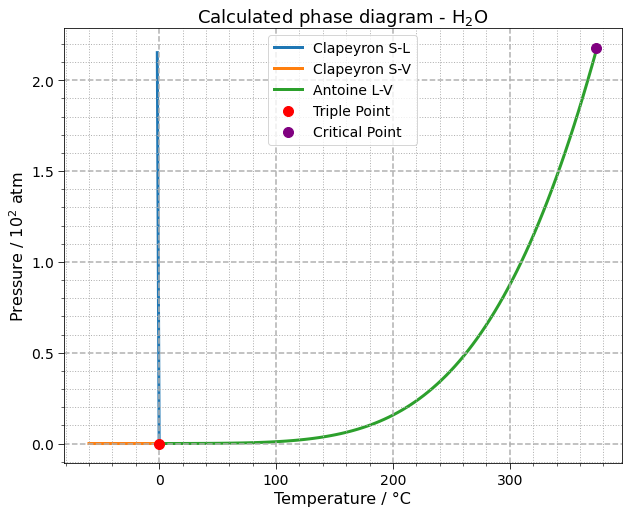

In [17]:
water.plot(T_unit='°C', P_unit='atm', scale_log=False)

The automatic title can be disabled:

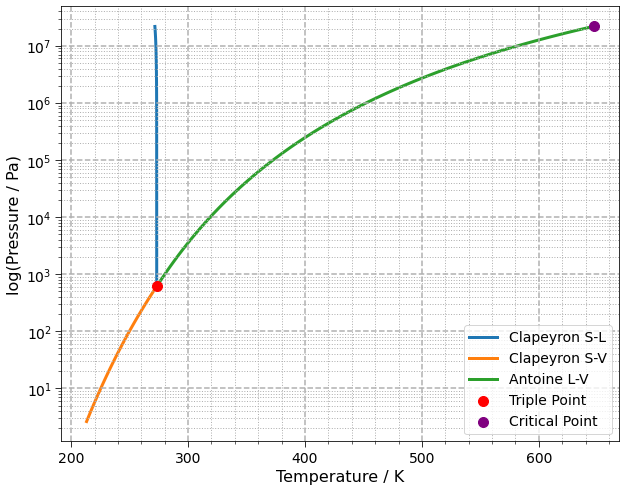

In [18]:
water.plot(title=False)

The automatic title text can also be changed:

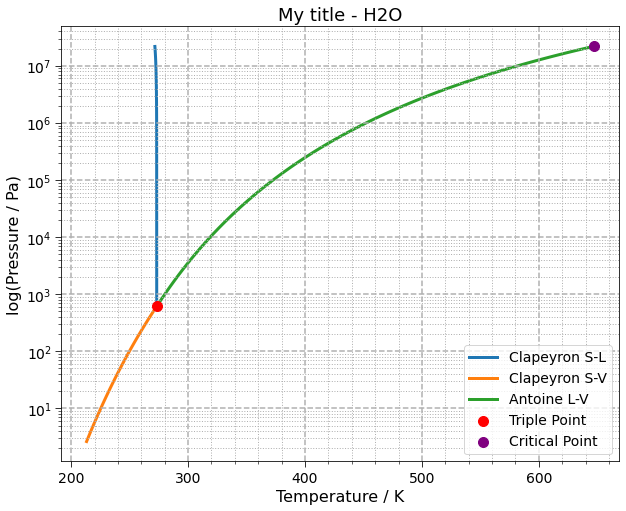

In [19]:
water.plot(title_text='My title - H2O')

If a well formated chemical formula is wanted, use the `format_formula` method:

In [20]:
my_title = 'My title - ' + water.format_formula()

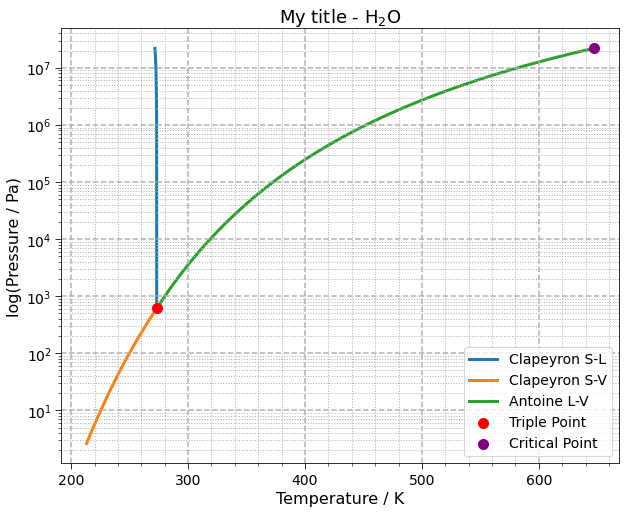

In [21]:
water.plot(title_text=my_title)

In [22]:
water.format_formula()

'$\\mathregular{H_2O}$'

The `plot` method returns a `matplotlib.axes._subplots.AxesSubplot` object. So it can be easily included in a canvas previously created by a Matplotlib figure. The method also receives an optional axes where the data should be plotted. So let's created a figure with 4 different forms of diagram phases for water:

In [23]:
import matplotlib.pyplot as plt

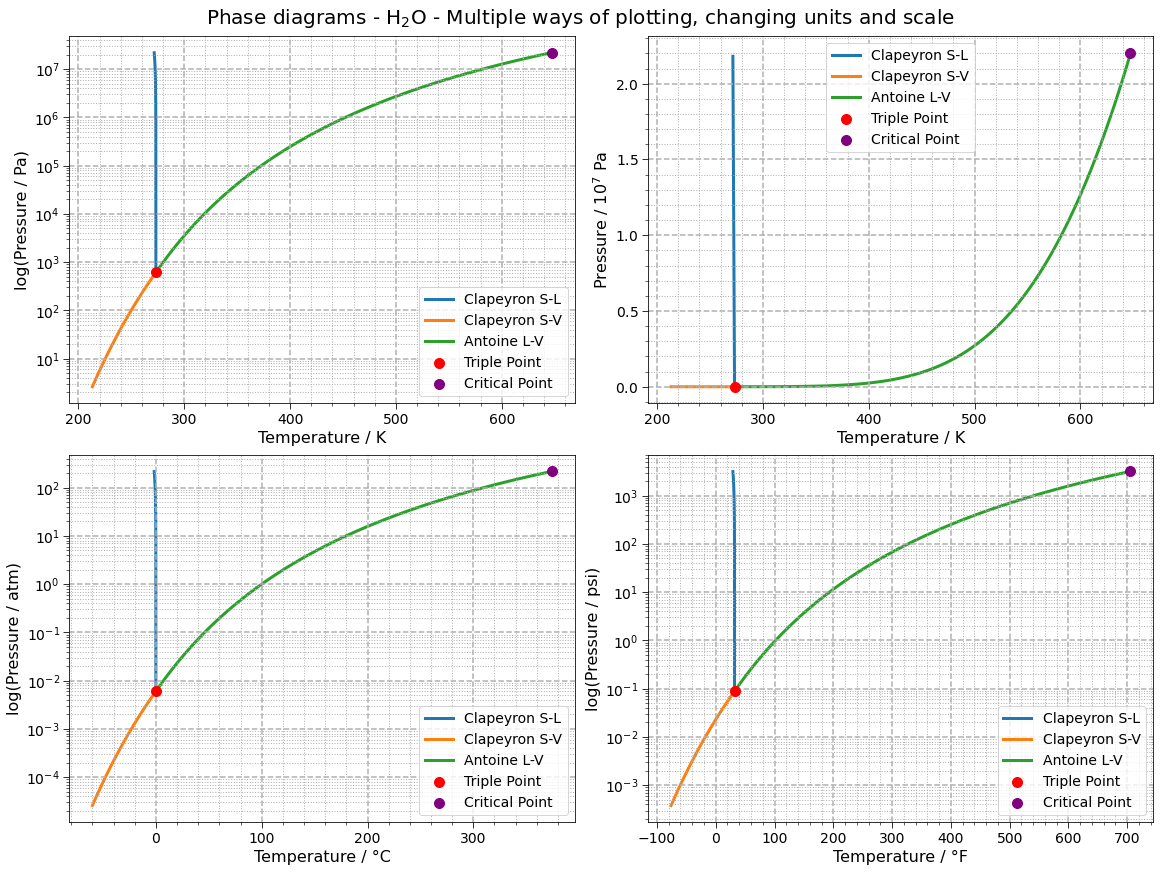

In [24]:
fig, arr = plt.subplots(nrows=2, ncols=2, figsize=(16,12), constrained_layout=True, facecolor=(1,1,1))

water.plot(ax=arr[0,0], title=False)
water.plot(ax=arr[0,1], title=False, scale_log=False)
water.plot(ax=arr[1,0], title=False, P_unit='atm', T_unit='°C')
water.plot(ax=arr[1,1], title=False, P_unit='psi', T_unit='°F', legend=True)

plot_title = 'Phase diagrams - ' + water.format_formula() + ' - Multiple ways of plotting, changing units and scale'
fig.suptitle(plot_title, fontsize=20)

# plt.savefig('phase_diagram_water.png', dpi=150)  # save the plot

plt.show()

## Other examples

Meanwhile few compounds are available. Let's see some other examples:

In [25]:
co2 = PhaseDiagram('CO2')

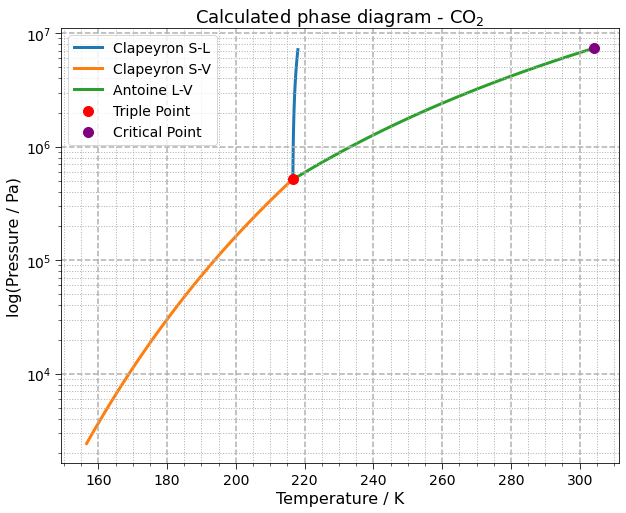

In [26]:
co2.plot()

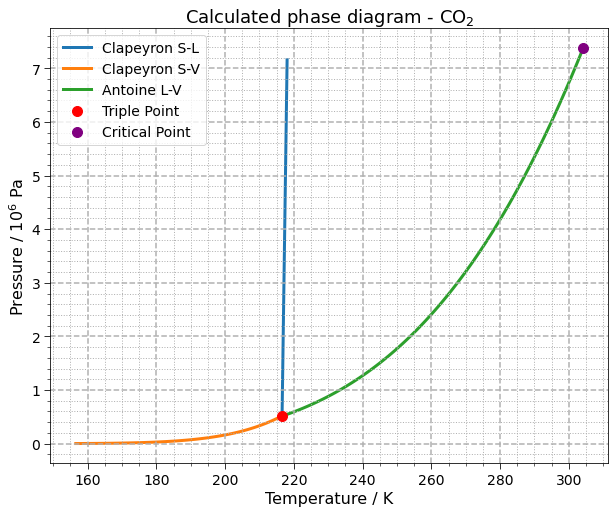

In [27]:
co2.plot(scale_log=False)

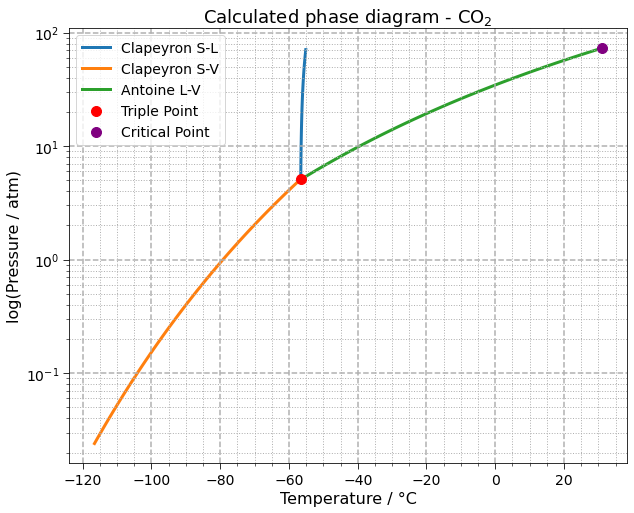

In [28]:
co2.plot(P_unit='atm', T_unit='°C')

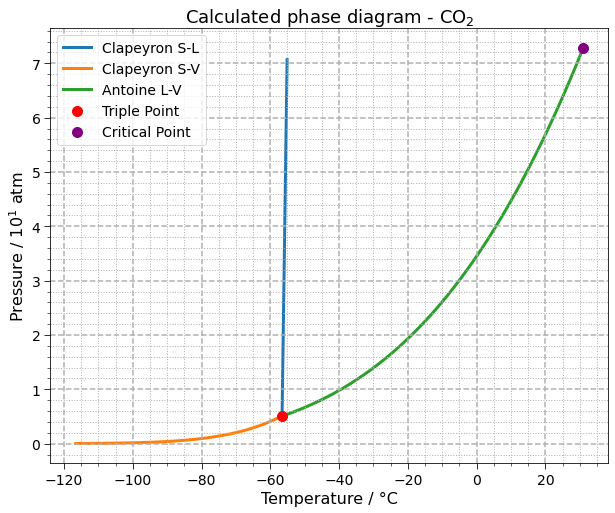

In [29]:
co2.plot(P_unit='atm', T_unit='°C', scale_log=False)

In [30]:
i2 = PhaseDiagram('iodine')

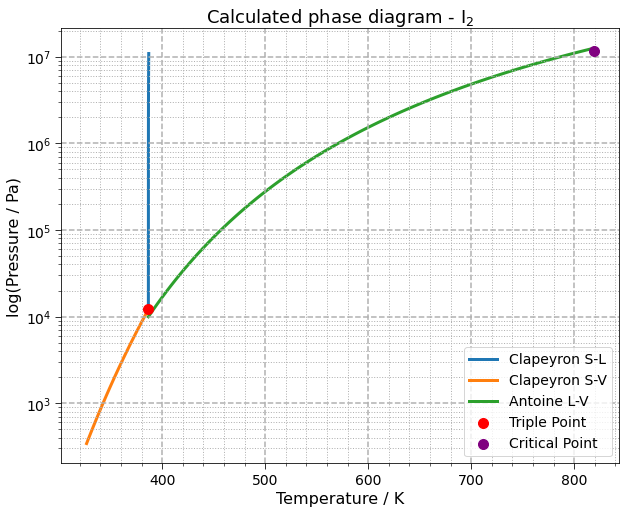

In [31]:
i2.plot()

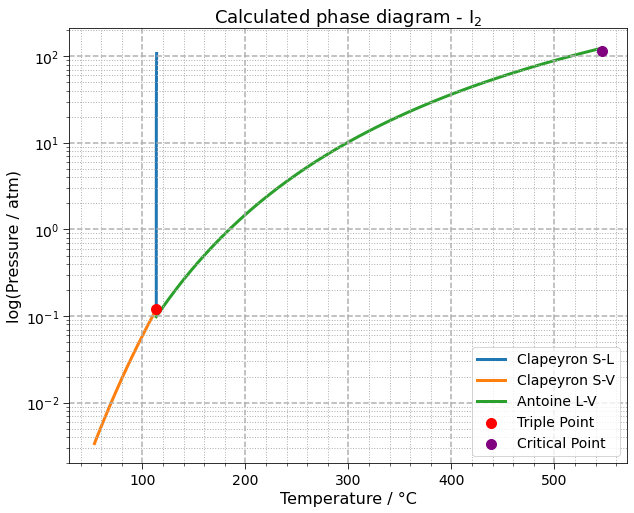

In [32]:
i2.plot(P_unit='atm', T_unit='°C')

An odd plot results when the temperature range in which the A, B and C parameters can be used is not the same range between the triple point and the critical point.

As can be seen, the values from the literature results in a expected CP pressure higher than the observed one.

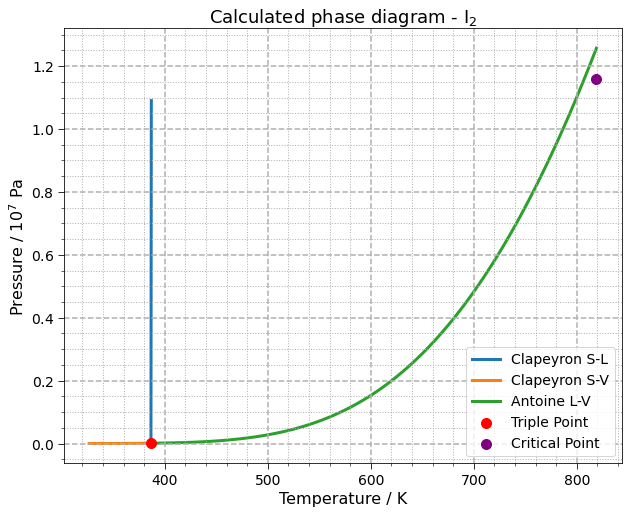

In [33]:
i2.plot(scale_log=False)

Temperature range in which the A, B and C parameters can be used:

In [34]:
i2.antoine_si

antoine_si(Tmin=241.99999999999997, Tmax=819.15, A=9.232263020132939, B=1556.9694, C=-89.17999999999998)

In [35]:
i2.triple_point[0]  # different from the Antoine range

386.65 <Unit('kelvin')>

In [36]:
i2.critical_point[0]

819.15 <Unit('kelvin')>